## Import all the necessary libraries

In [1070]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import zscore
%matplotlib inline

## Read the data into the notebook

In [1071]:
data = pd.read_csv('Data - Parkinsons.csv')

In [1072]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


(195, 24)

There are total 195 observations and 24 columns.

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [1074]:
# Abbreviations 	Feature description
# MDVP:F0 (Hz)	Average vocal fundamental frequency
# MDVP:Fhi (Hz)	Maximum vocal fundamental frequency
# MDVP:Flo (Hz)	Minimum vocal fundamental frequency
# MDVP:Jitter(%)	MDVP jitter in percentage
# MDVP:Jitter(Abs)	MDVP absolute jitter in ms
# MDVP:RAP	MDVP relative amplitude perturbation
# MDVP:PPQ	MDVP five-point period perturbation quotient
# Jitter:DDP	Average absolute difference of differences between jitter cycles
# MDVP:Shimmer	MDVP local shimmer
# MDVP:Shimmer(dB)	MDVP local shimmer in dB
# Shimmer:APQ3	Three-point amplitude perturbation quotient
# Shimmer:APQ5	Five-point amplitude perturbation quotient
# MDVP:APQ11	MDVP 11-point amplitude perturbation quotient
# Shimmer:DDA	Average absolute differences between the amplitudes of consecutive periods
# NHR	Noise-to-harmonics ratio
# HNR	Harmonics-to-noise ratio
# RPDE	Recurrence period density entropy measure
# D2	Correlation dimension
# DFA	Signal fractal scaling exponent of detrended fluctuation analysis
# Spread1	Two nonlinear measures of fundamental
# Spread2	Frequency variation
# PPE	Pitch period entropy


In [1075]:
data.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

All columns contain numeric values. Status is int type and other columns are all float type.

#### Let's check if the data has any missing values. 

In [1076]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### => There are no missing values in the dataset.

In [1077]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### Observations and likely challanges:

* All columns except MDVP:Fo(Hz) - Average vocal fundamental frequency ,MDVP:Fhi(Hz) - Maximum vocal fundamental frequency ,MDVP:Flo(Hz) - Minimum vocal fundamental frequency, spread1 (nonlinear measures of fundamental frequency) and D2(nonlinear dynamical complexity measure) contain values between 0 and 1.

* spread1 (nonlinear measures of fundamental frequency) contains negative values with maximum value is -2.43 and minimum value is -7.96.

* Data is positively skewed for below columns: 
  1. MDVP:Fo(Hz) - Average vocal fundamental frequency
  2. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
  3. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
  4. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
  5. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
  6. NHR
  
* There are outliers for some of the columns which need to be handled

#### Let's standardize column names for easier processing of data:

In [1078]:
#before processing column names:
print(data.columns)

data = data.rename(columns={'MDVP:Fo(Hz)': 'MDVP_Fo_Hz', 'MDVP:Fhi(Hz)' : 'MDVP_Fhi_Hz', 'MDVP:Flo(Hz)' : 'MDVP_Flo_Hz', 'MDVP:Jitter(%)' : 'MDVP_Jitter_percent',
                           'MDVP:Jitter(Abs)' : 'MDVP_Jitter_Abs', 'MDVP:RAP' : 'MDVP_RAP', 'MDVP:PPQ' : 'MDVP_PPQ',
                           'Jitter:DDP' : 'Jitter_DDP', 'MDVP:Shimmer' : 'MDVP_Shimmer', 'MDVP:Shimmer(dB)' : 'MDVP_Shimmer_dB',
                           'Shimmer:APQ3' : 'Shimmer_APQ3', 'Shimmer:APQ5' : 'Shimmer_APQ5', 'MDVP:APQ': 'MDVP_APQ',
                           'Shimmer:DDA' : 'Shimmer_DDA'})
#after modifying some of the column names
print(data.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz',
       'MDVP_Jitter_percent', 'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ',
       'Jitter_DDP', 'MDVP_Shimmer', 'MDVP_Shimmer_dB', 'Shimmer_APQ3',
       'Shimmer_APQ5', 'MDVP_APQ', 'Shimmer_DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


#### Target Variable Distribution : Health status

In [1079]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

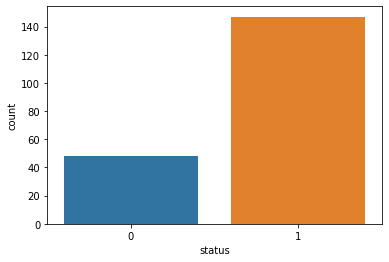

In [1080]:
sns.countplot(x="status",data=data)

#### => There are 147 observations where the person has parkinson's disease and 48 where the person is healthy

#### Let's plot various measures of vocal fundamental frequency:

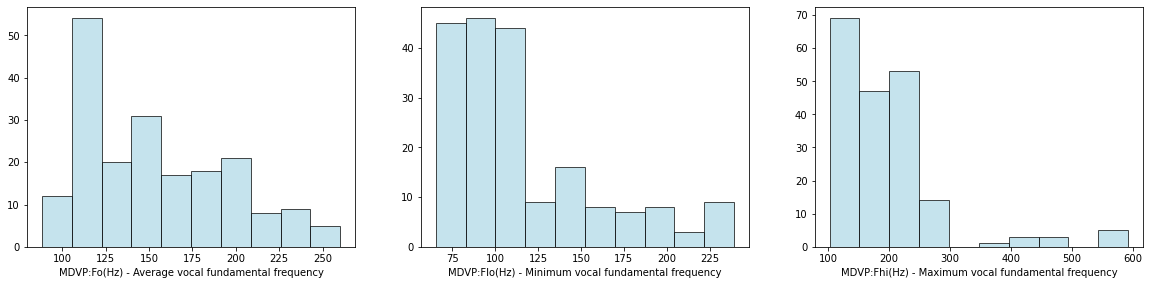

In [1081]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.MDVP_Fo_Hz, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fo(Hz) - Average vocal fundamental frequency')

plt.subplot(3,3,2)
plt.hist(data.MDVP_Flo_Hz, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Flo(Hz) - Minimum vocal fundamental frequency')

plt.subplot(3,3,3)
plt.hist(data.MDVP_Fhi_Hz, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fhi(Hz) - Maximum vocal fundamental frequency')

plt.show()

#### => Data is positively skewed for above columns

#### Let's plot several measures of variation in fundamental frequency (MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP)

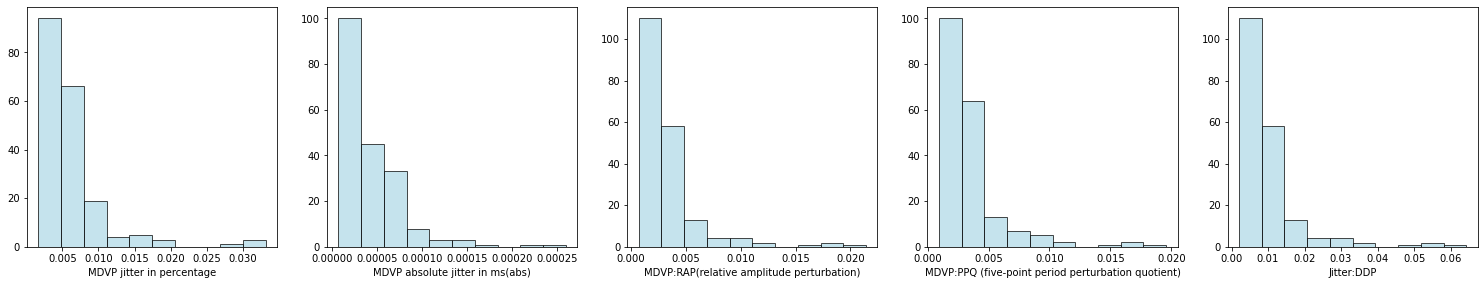

In [1082]:
plt.figure(figsize= (26,15))
plt.subplot(3,5,1)
plt.hist(data.MDVP_Jitter_percent, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP jitter in percentage')

plt.subplot(3,5,2)
plt.hist(data.MDVP_Jitter_Abs, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP absolute jitter in ms(abs)')

plt.subplot(3,5,3)
plt.hist(data.MDVP_RAP, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:RAP(relative amplitude perturbation)')

plt.subplot(3,5,4)
plt.hist(data.MDVP_PPQ, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:PPQ (five-point period perturbation quotient)')

plt.subplot(3,5,5)
plt.hist(data.Jitter_DDP, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Jitter:DDP')

plt.show()

#### => Above mesures have similar kind of positve skew for the observations. For all the variables most of the values lies close to 0.

####  Let's plot several measures of variation in fundamental frequency: MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP

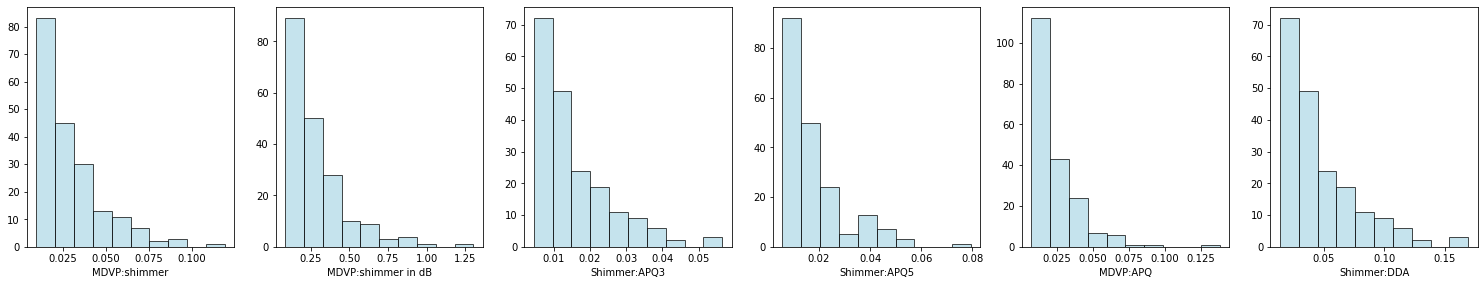

In [1083]:
plt.figure(figsize= (26,15))
plt.subplot(3,6,1)
plt.hist(data.MDVP_Shimmer, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:shimmer')

plt.subplot(3,6,2)
plt.hist(data.MDVP_Shimmer_dB, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:shimmer in dB')

plt.subplot(3,6,3)
plt.hist(data.Shimmer_APQ3, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ3')

plt.subplot(3,6,4)
plt.hist(data.Shimmer_APQ5, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ5')

plt.subplot(3,6,5)
plt.hist(data.MDVP_APQ, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:APQ')

plt.subplot(3,6,6)
plt.hist(data.Shimmer_DDA, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:DDA')

plt.show()

#### => Only MDVP:shimmer has few observations where value is greater than value 1, where other measures mostly lies between value of 0 and 0.1.

#### => All different measures follows similart distribution pattern where there is skewness in data.

####  Let's plot Two measures of ratio of noise to tonal components in the voice: NHR,HNR:

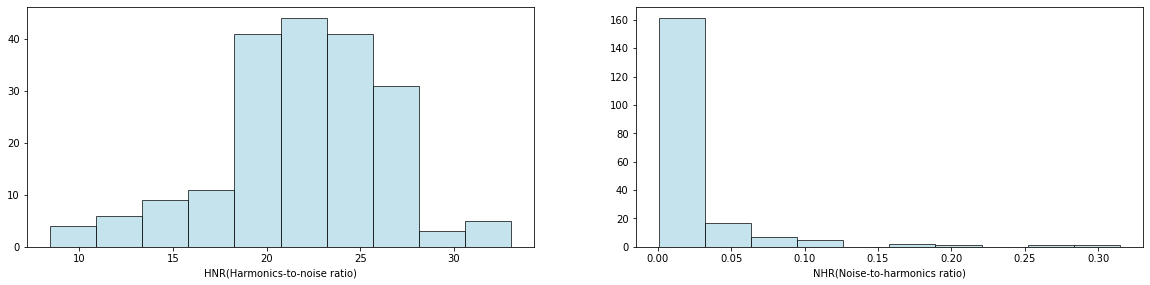

In [1084]:
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
plt.hist(data.HNR, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('HNR(Harmonics-to-noise ratio)')

plt.subplot(3,2,2)
plt.hist(data.NHR, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('NHR(Noise-to-harmonics ratio)')

plt.show()

#### => HNR variable values lies between 9 and 34, data looks bit normally distributed as there is less difference between mean and median values

#### => NHR variable values lies between 0 and 0.3, data looks skewed towards right.

####  Let's plot RPDE,D2 - Two nonlinear dynamical complexity measures:

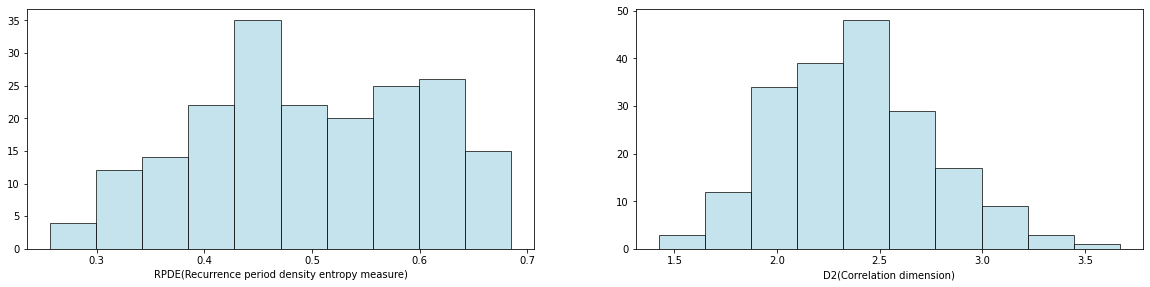

In [1085]:
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
plt.hist(data.RPDE, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('RPDE(Recurrence period density entropy measure)')

plt.subplot(3,2,2)
plt.hist(data.D2, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('D2(Correlation dimension)')

plt.show()

#### => Both RPDE and D2 variable data looks normally distributed. For RPDE values lies between 0.2 and <0.7, D2 values lies between value 1.5 and 3.5

### Let's check the relationship between each independent variable with target variable health status:

#### 1. MDVP:F0 (Hz)	vs   Health Status

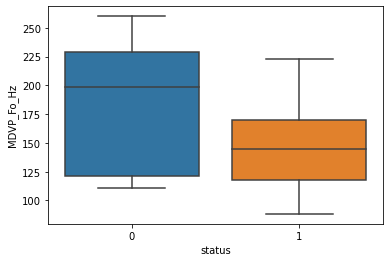

In [1086]:
#print(pd.pivot_table(data=data,index='Personal Loan',columns='Education',aggfunc='size'))
#sns.countplot(data.status,hue=data.MDVP_Fo_Hz)
sns.boxplot(y='MDVP_Fo_Hz', x='status', data=data)

#### => Average vocal fundamental frequency range is higher for a healthy person compared to person with Parkinson's disease.
#### => For patients with Parkinson's the value mostly lies around between 125 and 175 with max value 225.
#### => For the healthy person the value range is wide between values 125 to 225 and maximum value > 250 and with minimum value of lie between (100 and 125)

#### 2. MDVP:Fhi (Hz)	vs   Health Status

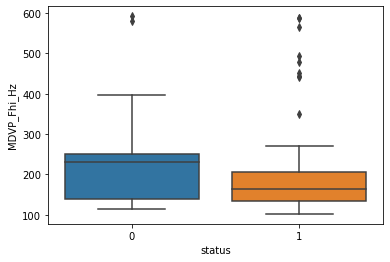

In [1087]:
sns.boxplot(y='MDVP_Fhi_Hz', x='status', data=data)

#### => Maximum vocal fundamental frequency range is higher for a healthy person compared to person with Perkinson's disease.
#### => For patients with Parkinson's the values mostly lie around between 150 and 200 and there few outliers.
#### => For the healthy person the value range is wide between values 150 to 250 and maximum value is 400 with few outliers with value near to 600

#### 3. MDVP:Flo (Hz)	vs   Health Status

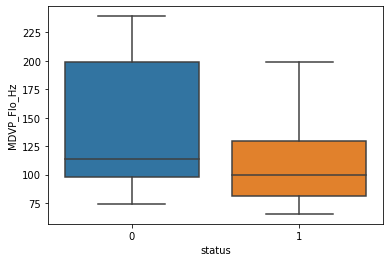

In [1088]:
sns.boxplot(y='MDVP_Flo_Hz', x='status', data=data)

#### => Minimum vocal fundamental frequency range is higher for a healthy person compared to person with Perkinson's disease.
#### => For patients with Parkinson's the value mostly lies around between 80 and 125 with max value 200.
#### => For the healthy person the value range is wide between values 100 to 200 and maximum value > 225 and with minimum value of 75.

#### 4. MDVP:Jitter(%)	vs   Health Status

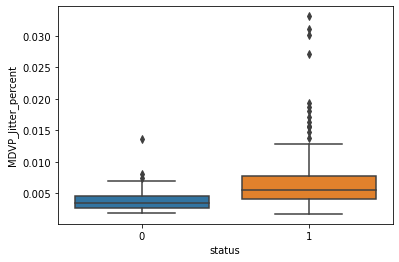

In [1089]:
sns.boxplot(y='MDVP_Jitter_percent', x='status', data=data)

#### => MDVP jitter in percentage range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly lies above 0.005 and with some outliers
#### => For the healthy person the value is mostly below 0.005 with max lie between 0.005 and 0.010 with few outliers.

#### 5. MDVP:Jitter(Abs)	vs   Health Status

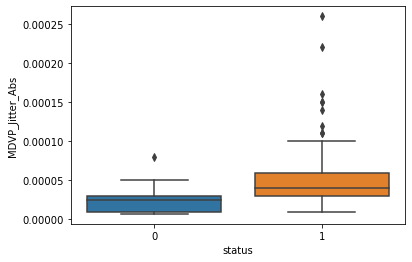

In [1090]:
sns.boxplot(y='MDVP_Jitter_Abs', x='status', data=data)

#### => MDVP jitter(absolute) range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly lies around 0.00005 with maximum value of 0.00010 and few outliers
#### => For the healthy person the value lies between 0 and 0.00005.

#### 6. MDVP:RAP	vs   Health Status

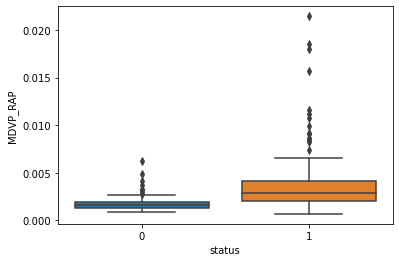

In [1091]:
sns.boxplot(y='MDVP_RAP', x='status', data=data)

#### => MDVP:RAP range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly lies between 0.0025-0.005 with maximum value of 0.007 and few outliers.
#### => For the healthy person the value lies between 0 and 0.0025.

#### 7. MDVP:PPQ	vs   Health Status

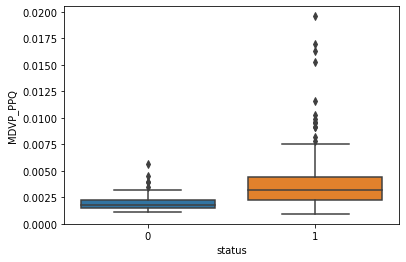

In [1092]:
sns.boxplot(y='MDVP_PPQ', x='status', data=data)

#### => MDVP:PPQ range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly between 0.0025 - 0.0050 with maximum value of 0.0075 and few outliers.
#### => For the healthy person the value lies around 0.0025.

#### 8. Jitter:DDP	vs   Health Status

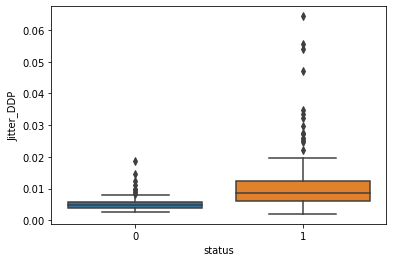

In [1093]:
sns.boxplot(y='Jitter_DDP', x='status', data=data)

#### => Jitter_DDP range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly around 0.01 with maximum value of 0.02 and few outliers with value greater than 0.02.
#### => For the healthy person the values lie below 0.01 with few outliers reaching till value 0.02.

#### 9. MDVP:Shimmer	vs   Health Status

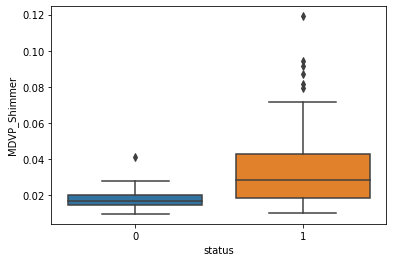

In [1094]:
sns.boxplot(y='MDVP_Shimmer', x='status', data=data)

#### => MDVP shimmer range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly between 0.02 and 0.04 with maximum value of 0.07 and few outliers with value greater than 0.08.
#### => For the healthy person the values lie between 0.01 and 0.03.

#### 10. MDVP:Shimmer(dB)	vs   Health Status

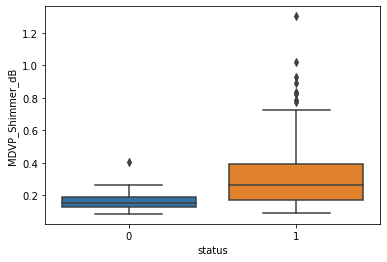

In [1095]:
sns.boxplot(y='MDVP_Shimmer_dB', x='status', data=data)

#### => MDVP shimmer in dB range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value mostly between 0.2 and 0.4 with maximum value of 0.7 and few outliers with value greater than 0.8.
#### => For the healthy person the values lie between 0.1 and 0.3.

#### 11. Shimmer:APQ3	vs   Health Status

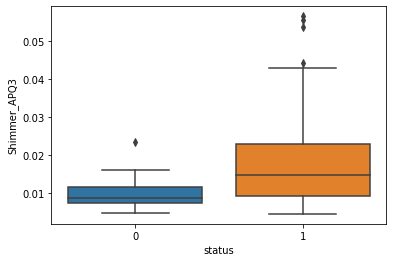

In [1096]:
sns.boxplot(y='Shimmer_APQ3', x='status', data=data)

#### => Shimmer APQ3 range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value lies between 0.01 and 0.02 and maximum value of 0.04 with some outliers with value greter than 0.04
#### => For the healthy person the value mostly around 0.01 with maximum value of 0.015 .

#### 12. Shimmer:APQ5	vs   Health Status

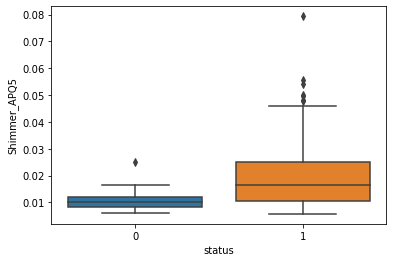

In [1097]:
sns.boxplot(y='Shimmer_APQ5', x='status', data=data)

#### => Shimmer APQ5 range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value lies between 0.01 and 0.025 and maximum value of 0.05 with some outliers with value greter than 0.05
#### => For the healthy person the value mostly around 0.01 with maximum value of 0.015.

#### 13. MDVP:APQ	vs   Health Status

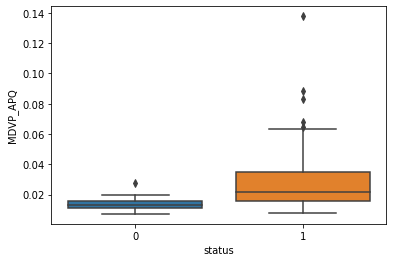

In [1098]:
sns.boxplot(y='MDVP_APQ', x='status', data=data)

#### => MDVP APQ range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value lies between 0.02 and 0.04 and maximum value of around 0.06 with some outliers with value greter than 0.06
#### => For the healthy person the values mostly lie below 0.02.

#### 14. Shimmer:DDA	vs   Health Status

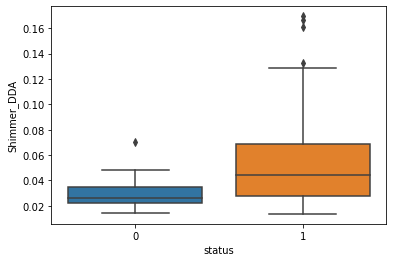

In [1099]:
sns.boxplot(y='Shimmer_DDA', x='status', data=data)

#### => Shimmer DDA range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the value lies between 0.03 and 0.07 and maximum value of around 0.13 with some outliers with value greter than 0.13
#### => For the healthy person the values mostly lie between 0.02 and 0.04 with maximum value 0.05.

#### 15. NHR	vs   Health Status

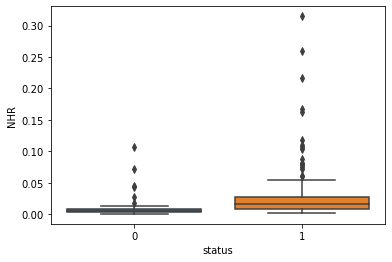

In [1100]:
sns.boxplot(y='NHR', x='status', data=data)

#### => NHR range is higher for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the range is 0 and 0.06
#### => For the healthy person the range is 0 and 0.025 and few outliers greater than value 0.025

#### 16. HNR	vs   Health Status

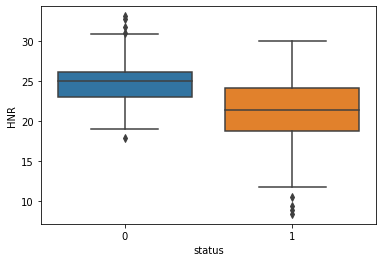

In [1101]:
sns.boxplot(y='HNR', x='status', data=data)

#### => HNR range is lower for a person with Perkinson's disease compared to healthy person.
#### => For patients with Parkinson's the values mostly lie between 19 and 24, with maximum value of 30 and outliers at minimum side.
#### => For the healthy person the the values mostly lie between 23 and 26, with maximum value of 32 and outliers on both the side.

#### 17. RPDE	vs   Health Status

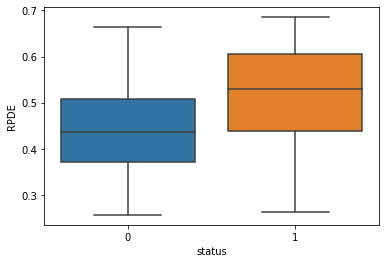

In [1102]:
sns.boxplot(y='RPDE', x='status', data=data)

#### => RPDE range is lower for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between 0.045 and 0.06, with maximum value around 0.07.
#### => For the healthy person the the values mostly lie between 0.04 and 0.05.

#### 18. D2	vs   Health Status

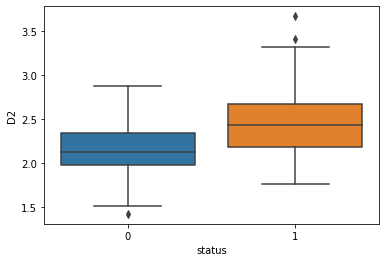

In [1103]:
sns.boxplot(y='D2', x='status', data=data)

#### => D2 range is lower for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between 2.25 and 2.75, with maximum value around 3.5 and minimum value of 1.75.
#### => For the healthy person the the values mostly lie between 2.0and 2.5 with maximum value around 3.0

#### 19. DFA	vs   Health Status

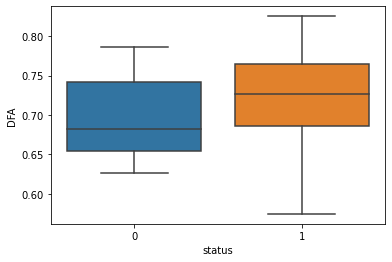

In [1104]:
sns.boxplot(y='DFA', x='status', data=data)

#### => DFA range is higher for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between 0.70 and 0.755, with maximum value around 0.9 and minimum value around 0.55
#### => For the healthy person the the values mostly lie between 0.65 and 0.75 with maximum value around 0.80 and minimum value lie between 0.6 and 0.65.

#### 20. Spread1	vs   Health Status

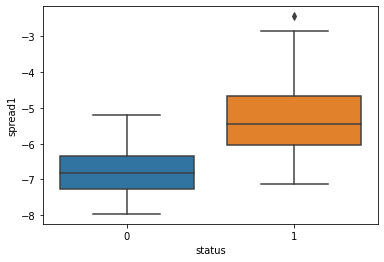

In [1105]:
sns.boxplot(y='spread1', x='status', data=data)

#### => spread1 range is higher for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between -6 and -4, with maximum value around -3 and minimum value around -7
#### => For the healthy person the the values mostly lie between -7 and -6 with maximum value around -5 and minimum value lie between -8.

#### 21. Spread2	vs   Health Status

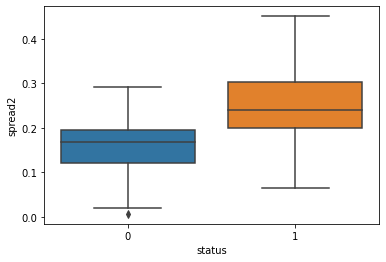

In [1106]:
sns.boxplot(y='spread2', x='status', data=data)

#### => spread2 range is higher for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between 0.2 and 0.3, with maximum value around 0.5 and minimum value around 0.05
#### => For the healthy person the the values mostly lie between 0.1 and 0.2 with maximum value around 0.3 and minimum value lie around 0.

#### 22. PPE	vs   Health Status

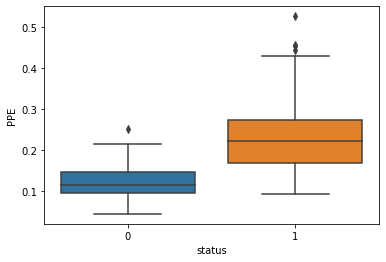

In [1107]:
sns.boxplot(y='PPE', x='status', data=data)

#### => PPE range is higher for a person with Perkinson's disease compared to a healthy person.
#### => For patients with Parkinson's the values mostly lie between 0.2 and 0.3, with maximum value around 0.4 and minimum value around 0.1
#### => For the healthy person the the values mostly lie between 0.1 and 0.2 with maximum value around 0.2 and minimum value lie around 0.

In [1108]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP_Fo_Hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP_Fhi_Hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP_Flo_Hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP_Jitter_percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP_Jitter_Abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP_RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP_PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter_DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP_Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP_Shimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


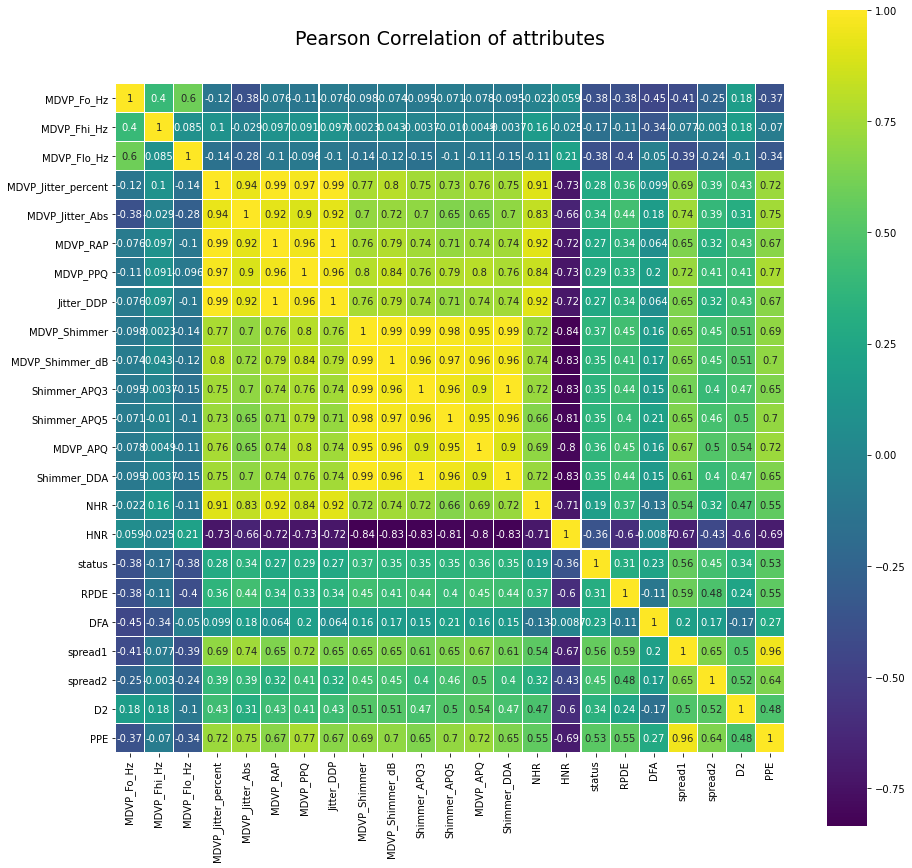

In [1109]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between any independent variable and class variable.

### => MDVP_Jitter(%) has a very high correlation with MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP MDVP_Shimmer has a very correlation with MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA this may be because they are related to each other.

### => The target variable status has a weak positive corelation with spread1 and PPE(Entropy)

#### Name column is not required for predictive model building so we can drop it.

In [1110]:
data = data.drop('name',axis=1)

### StandardScaler normalizes the data using the formula (x-mean)/standard deviation. We have seen many variables from the featureset have skewness issue, so we will apply StandardScalar to normalize data.

In [1111]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()


X = data.drop('status',axis=1)     # Predictor feature columns (8 X m)

Y = data['status']   # Predicted class (1=Prakinson's Patient, 0=Healthy) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

std_scale = std_scale.fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [1112]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data1.index)) * 100))

69.74% data is in training set
30.26% data is in test set


## Logistic Regression

In [1113]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5         6  \
0 -0.540812 -0.295293 -0.099222 -0.52524 -0.518743  0.304152 -0.207206   

          7         8         9  ...        13        14        15        16  \
0  0.304274  0.201216  0.186788  ...  0.075823 -0.212585 -0.056513 -0.211231   

        17        18        19        20        21  intercept  
0  0.24863  0.935272  0.110481  1.043262  0.635146   2.263207  

[1 rows x 23 columns]


In [1114]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8135593220338984


### Lets check the confusion matrix and classification report

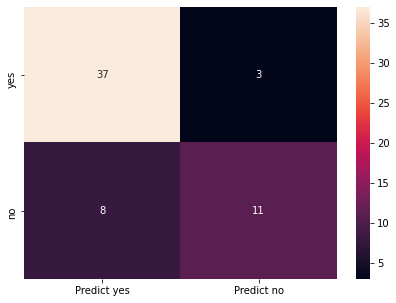

In [1115]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [1116]:
print("Logistic Regression Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, y_predict))
print("Recall Score: ",metrics.recall_score(y_test, y_predict))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        40
           0       0.79      0.58      0.67        19

    accuracy                           0.81        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.81      0.81      0.80        59

Precision Score:  0.8222222222222222
Recall Score:  0.925


# SVM

In [1117]:
from sklearn import svm

svc = svm.SVC(gamma=0.025, C=3)
svc.fit(x_train , y_train)
svm_y_pred = svc.predict(x_test)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.85


### Lets check the confusion matrix and classification report

Confusion Matrix


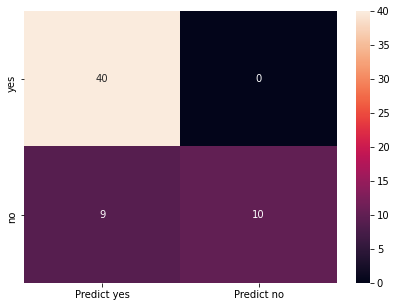

In [1118]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, svm_y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [1119]:
print("SVM Classification Report")
print(metrics.classification_report(y_test, svm_y_pred, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, svm_y_pred))
print("Recall Score: ",metrics.recall_score(y_test, svm_y_pred))

SVM Classification Report
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        40
           0       1.00      0.53      0.69        19

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59

Precision Score:  0.8163265306122449
Recall Score:  1.0


# Naive Bayes

In [1120]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

In [1121]:
nb_train_predict = nb_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print()

Model Accuracy: 0.7206



In [1122]:
nb_test_predict = nb_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
print()

Model Accuracy: 0.6780



### Lets check the confusion matrix and classification report

Confusion Matrix


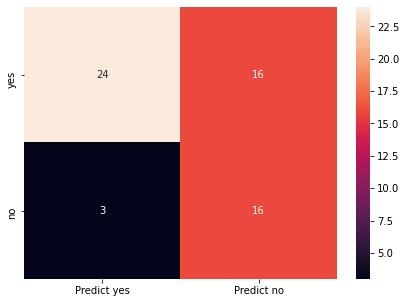

In [1123]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nb_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [1124]:
print("NB Classification Report")
print(metrics.classification_report(y_test, nb_test_predict, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, nb_test_predict))
print("Recall Score: ",metrics.recall_score(y_test, nb_test_predict))

NB Classification Report
              precision    recall  f1-score   support

           1       0.89      0.60      0.72        40
           0       0.50      0.84      0.63        19

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59

Precision Score:  0.8888888888888888
Recall Score:  0.6


## Build Decision Tree Model

In [1125]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini',max_depth=10, random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [1126]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.847457627118644


### Lets check the confusion matrix and classification report

0.847457627118644


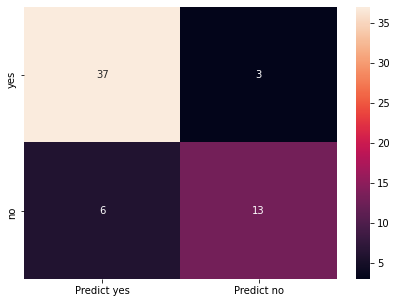

In [1127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTree.score(x_test , y_test))
y_predict = dTree.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1128]:
print("Decision Tree Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, y_predict))
print("Recall Score: ",metrics.recall_score(y_test, y_predict))

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.86      0.93      0.89        40
           0       0.81      0.68      0.74        19

    accuracy                           0.85        59
   macro avg       0.84      0.80      0.82        59
weighted avg       0.85      0.85      0.84        59

Precision Score:  0.8604651162790697
Recall Score:  0.925


# Train a meta-classifier and note the accuracy on test data

In [1129]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42,max_features=12)),
    ('gb', GradientBoostingClassifier(n_estimators = 50,random_state=1)),
    ('svm', svm.SVC(gamma=0.025, C=1000,probability=True)),
    ('nb', GaussianNB())
]
sclf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train, y_train).score(x_test, y_test)

0.8813559322033898

#                             Bagging

In [1130]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.8305084745762712


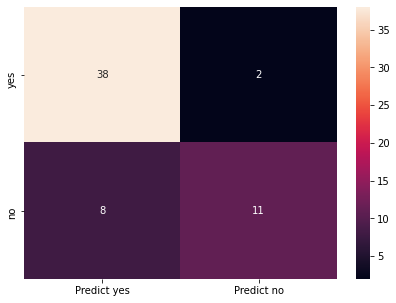

In [1131]:
from sklearn.metrics import confusion_matrix

y_predict_bagging = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))
cm = confusion_matrix(y_test, y_predict_bagging, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1132]:
print("Bagging Classification Report")
print(metrics.classification_report(y_test, y_predict_bagging, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, y_predict_bagging))
print("Recall Score: ",metrics.recall_score(y_test, y_predict_bagging))

Bagging Classification Report
              precision    recall  f1-score   support

           1       0.83      0.95      0.88        40
           0       0.85      0.58      0.69        19

    accuracy                           0.83        59
   macro avg       0.84      0.76      0.79        59
weighted avg       0.83      0.83      0.82        59

Precision Score:  0.8260869565217391
Recall Score:  0.95


# Ensemble RandomForest Classifier

In [1133]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.847457627118644


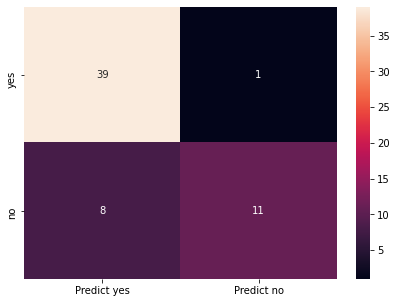

In [1134]:
y_predict_rf = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm = confusion_matrix(y_test, y_predict_rf, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1135]:
# importance of features
X = data1.drop('status',axis=1)
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X.columns))

                          Imp
MDVP_Fo_Hz           0.109304
MDVP_Fhi_Hz          0.035936
MDVP_Flo_Hz          0.052110
MDVP_Jitter_percent  0.027000
MDVP_Jitter_Abs      0.007399
MDVP_RAP             0.024938
MDVP_PPQ             0.017299
Jitter_DDP           0.042800
MDVP_Shimmer         0.014953
MDVP_Shimmer_dB      0.017510
Shimmer_APQ3         0.033883
Shimmer_APQ5         0.019739
MDVP_APQ             0.018891
Shimmer_DDA          0.037019
NHR                  0.016702
HNR                  0.029744
RPDE                 0.022416
DFA                  0.010242
spread1              0.091283
spread2              0.031479
D2                   0.036715
PPE                  0.302640


In [1136]:
print("Random Forest Classification Report")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, y_predict_rf))
print("Recall Score: ",metrics.recall_score(y_test, y_predict_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.83      0.97      0.90        40
           0       0.92      0.58      0.71        19

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59

Precision Score:  0.8297872340425532
Recall Score:  0.975


#                     Ensemble - GradientBoost

In [1137]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.8813559322033898


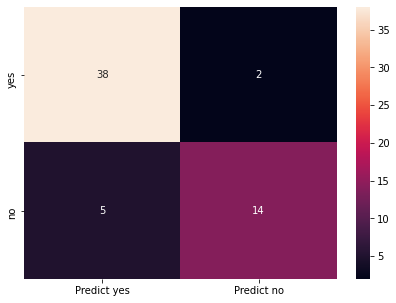

In [1138]:
y_predict_gb = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm = confusion_matrix(y_test, y_predict_gb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1139]:
print("Gradient Boost Classification Report")
print(metrics.classification_report(y_test, y_predict_gb, labels=[1, 0]))
print("Precision Score: ",metrics.precision_score(y_test, y_predict_gb))
print("Recall Score: ",metrics.recall_score(y_test, y_predict_gb))

Gradient Boost Classification Report
              precision    recall  f1-score   support

           1       0.88      0.95      0.92        40
           0       0.88      0.74      0.80        19

    accuracy                           0.88        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.88      0.88      0.88        59

Precision Score:  0.8837209302325582
Recall Score:  0.95


### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

Area under curve for model Logistic Regression = 0.751974
Area under curve for model SVM = 0.830921
Area under curve for model Naive Bayes = 0.721053
Area under curve for model Bagging = 0.764474
Area under curve for model Random Forest = 0.776974
Area under curve for model Gradient Boosting = 0.843421


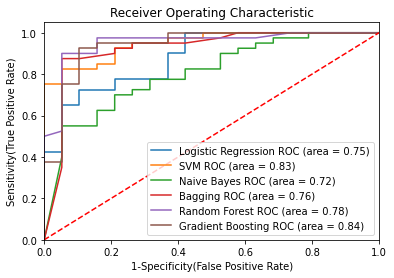

In [1140]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'SVM',
    'model': svm.SVC(gamma=0.025, C=1000,probability=True),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Bagging',
    'model': BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(n_estimators = 50,random_state=1),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

## Conclusion: 
### In this classification problem we have given voice analysis data for patients tested for Parkinson's disease . The classification in the given data is skewed so alone accuracy cannot be a good measure as healthy person count is less compared to patient with Parkinson's disease. 

### We have created models using classifiers : Linear Rgression, SVM and Naive Bayes. 
### Ensamble techinques used to create models are: Random Forest, Gradient Boosting, Bagging

### ROC - AUC (True Positive Rate vs False Positive Rate) represents a good measure as it is immune to imbalance in classifiers. so based on above AUC value and we can say for given classification problem, Gradient Boosting algorithm gives the best ensamble model with Accuracy of 88% and Area Under the Curve value 84% and after that SVM gives the best classifier with Area Under the Curve value 83% and Accuracy 85%, as displayed in above ROC-AUC graph.